In [361]:
from datetime import datetime
import numpy as np
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
%matplotlib inline

rhost='db host ip'
rport=3306
ruser='user'
rpasswd='password'
rdb='riders'

In [ ]:
conn = pymysql.connect(host=rhost
                       , port=rport
                       , user=ruser
                       , passwd=rpasswd
                       , db=rdb)
df_user = pd.read_sql("select system_user() from dual",conn)
conn.close()
df_user.head()

In [363]:
conn = pymysql.connect(host=rhost
                       , port=rport
                       , user=ruser
                       , passwd=rpasswd
                       , db=rdb)
sql_select = "SELECT u.Pickup_Time, n.* FROM uber_pickup u, neighborhood n, coordinates c \
              WHERE c.lat = u.lat AND c.lon = u.lon AND c.processed = 1 \
              AND n.lat = c.lat AND n.lon = c.lon;"

uber_df = pd.read_sql(sql_select,conn)
conn.close()
uber_df.head()


,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
0,2014-08-01 19:32:00,Beach Haven West,,Stafford Township,Ocean County,NJ,US,39.6569,-74.2258
1,2014-08-22 20:05:00,Brightwater Cottages,,Toms River,Ocean County,NJ,US,39.9819,-74.0661
2,2014-08-22 20:05:00,Dover Beaches North,,Toms River,Ocean County,NJ,US,39.9819,-74.0661
3,2014-08-31 20:48:00,Dover Beaches North,,Toms River,Ocean County,NJ,US,39.9824,-74.0705
4,2014-08-31 20:28:00,Dover Beaches North,,Toms River,Ocean County,NJ,US,39.9827,-74.0681


In [364]:
uber_neighborhood_sg = uber_df['Pickup_Time'].groupby(uber_df['Neighborhood'])
uber_neighborhood_sg.describe().head(12)

Neighborhood         
Adelphia       count                       1
               unique                      1
               top       2014-08-14 23:13:00
               freq                        1
               first     2014-08-14 23:13:00
               last      2014-08-14 23:13:00
Alphabet City  count                    1103
               unique                   1098
               top       2014-09-25 21:22:00
               freq                        2
               first     2014-04-01 08:41:00
               last      2014-09-30 20:19:00
Name: Pickup_Time, dtype: object

In [365]:
type(uber_neighborhood_sg)

pandas.core.groupby.SeriesGroupBy

In [366]:
# get count by neighbourhood
neighborhood_df = pd.DataFrame({'count' : uber_neighborhood_sg.size()}).reset_index()
print('Neighborhood with lowest ubder pickup\n', neighborhood_df.sort_values(by='count').head(5))
print('Neighborhood with highest ubder pickup\n',neighborhood_df.sort_values(by='count').tail(5))

Neighborhood with lowest ubder pickup
       Neighborhood  count
0         Adelphia      1
51       Concordia      1
56          Dayton      1
65   East Freehold      1
117        Keasbey      1
Neighborhood with highest ubder pickup
            Neighborhood  count
89              Gowanus  13723
131     Lower Manhattan  20169
16   Bedford-Stuyvesant  23702
54        Crown Heights  26534
166          Park Slope  39346


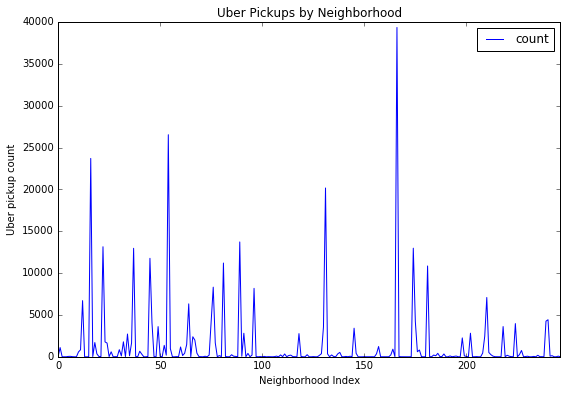

In [367]:
neighborhool_plot = neighborhood_df.plot(title='Uber Pickups by Neighborhood', figsize=(9,6))
neighborhool_plot.set_xlabel('Neighborhood Index')
neighborhool_plot.set_ylabel('Uber pickup count')

From the above plot, it seems like most of the uber pickup happen in Neighborhood of Park Slope, Crown Heights and Bedford-Stuyvesant. 

In [368]:
uber_df[(uber_df['Neighborhood'] == 'Park Slope')].head(5)

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
58331,2014-09-26 00:28:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6577,-73.9829
58510,2014-05-26 00:23:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6578,-73.9829
58511,2014-06-19 00:24:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6578,-73.9829
58517,2014-09-28 16:39:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6578,-73.9828
58681,2014-08-27 18:07:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6579,-73.9831


In [369]:
uber_df[(uber_df['Neighborhood'] == 'Crown Heights')].head(5)

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
80543,2014-05-20 15:43:00,Crown Heights,Brooklyn,New York,Kings County,NY,US,40.6634,-73.9608
80544,2014-08-08 22:26:00,Crown Heights,Brooklyn,New York,Kings County,NY,US,40.6634,-73.9608
80545,2014-08-10 01:08:00,Crown Heights,Brooklyn,New York,Kings County,NY,US,40.6634,-73.9608
80546,2014-05-24 14:59:00,Crown Heights,Brooklyn,New York,Kings County,NY,US,40.6634,-73.9607
80547,2014-06-14 22:27:00,Crown Heights,Brooklyn,New York,Kings County,NY,US,40.6634,-73.9606


In [370]:
uber_df[(uber_df['Neighborhood'] == 'Bedford-Stuyvesant')].head(5)

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
155090,2014-08-07 17:34:00,Bedford-Stuyvesant,Brooklyn,New York,Kings County,NY,US,40.6763,-73.9085
155829,2014-06-28 19:52:00,Bedford-Stuyvesant,Brooklyn,New York,Kings County,NY,US,40.6764,-73.9095
155830,2014-09-16 09:24:00,Bedford-Stuyvesant,Brooklyn,New York,Kings County,NY,US,40.6764,-73.9093
156651,2014-08-18 20:59:00,Bedford-Stuyvesant,Brooklyn,New York,Kings County,NY,US,40.6765,-73.9137
156653,2014-04-12 15:55:00,Bedford-Stuyvesant,Brooklyn,New York,Kings County,NY,US,40.6765,-73.9081


Interestingly from the data collected so far, the highest number of uber pickup were called from Brooklyn sublocality.

In [371]:
brooklyn_df = uber_df[(uber_df['Sublocality'] == 'Brooklyn')]
brooklyn_df.head(5)

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
514,2014-09-17 01:34:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5721,-73.9979
515,2014-09-19 07:27:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5721,-73.9905
521,2014-07-27 12:29:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5724,-73.9945
522,2014-08-09 19:09:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5725,-73.9894
524,2014-08-09 13:55:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5727,-73.9975


In [372]:
brooklyn_ts = brooklyn_df['Pickup_Time'].groupby(brooklyn_df['Pickup_Time']).count()
brooklyn_ts.head(5)

Pickup_Time
2014-04-01 00:09:00    1
2014-04-01 00:11:00    1
2014-04-01 00:16:00    1
2014-04-01 00:43:00    1
2014-04-01 00:44:00    1
Name: Pickup_Time, dtype: int64

In [373]:
type(brooklyn_ts)

pandas.core.series.Series

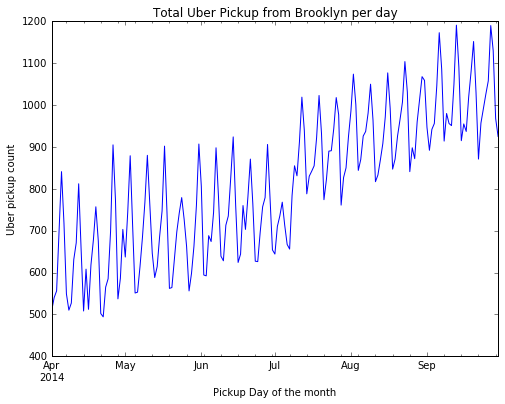

In [374]:
brooklyn_ts_plot = brooklyn_ts.resample('D').count().plot(title='Total Uber Pickup from Brooklyn per day', figsize=(8,6))
brooklyn_ts_plot.set_xlabel('Pickup Day of the month')
brooklyn_ts_plot.set_ylabel('Uber pickup count')

As September 2014 is showing up for higher higher number of uber pickup call, let's analyze the September data closely for Brooklyn.

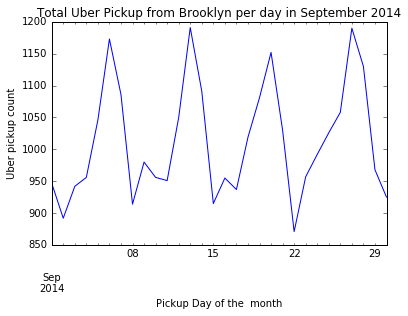

In [375]:
# Daily plot for total number of uber pickups
brooklyn_ts_sept_plot = brooklyn_ts['2014-09'].resample('D').count().plot(title='Total Uber Pickup from Brooklyn per day in September 2014')
brooklyn_ts_sept_plot.set_xlabel('Pickup Day of the  month')
brooklyn_ts_sept_plot.set_ylabel('Uber pickup count')

From the above lot, it seems like the most uber pick calls happens on certain day of the week and  that is usually saturday and sunday calls for uber pickup

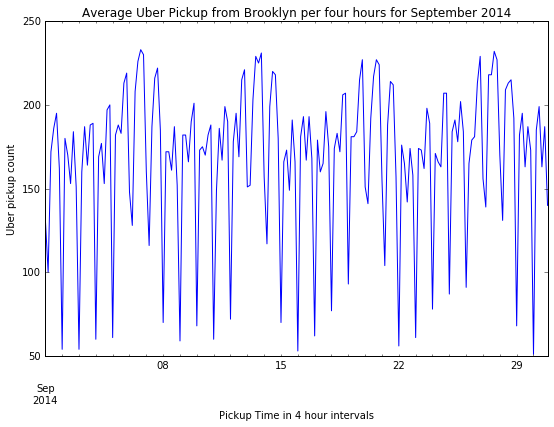

In [376]:
brooklyn_4h_plot = brooklyn_ts['2014-09'].resample('4H').count().plot(figsize=(9,6),
                                           title='Average Uber Pickup from Brooklyn per four hours for September 2014')
brooklyn_4h_plot.set_xlabel('Pickup Time in 4 hour intervals')
brooklyn_4h_plot.set_ylabel('Uber pickup count')

Now there are few peak days showing up for Septembet 2014 in regards to Uber pickup calls in Brooklyn. Let's take a close look at couple of these peaks.

First peak is showing up between September 6 and 7 that is Sat/Sun of the long weekend.

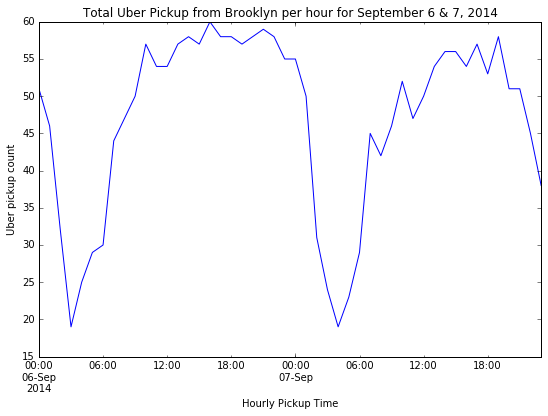

In [377]:
brooklyn_h_sept6_7_plot = brooklyn_ts['2014-09-06':'2014-09-07'].resample('H').count().plot(figsize=(9,6),
                                                         title='Total Uber Pickup from Brooklyn per hour for September 6 & 7, 2014')
brooklyn_h_sept6_7_plot.set_xlabel('Hourly Pickup Time')
brooklyn_h_sept6_7_plot.set_ylabel('Uber pickup count')

So most of the uber pickup happened between noon and some time before 23rd hours on September 6 in Brooklyn.

Next check the statistics on Brookly neighborhoods for uber pickup calls around noon and 23rd hours on September 6, 2014

In [378]:
ts_index = pd.PeriodIndex(brooklyn_df['Pickup_Time'].values, freq='s')
ts_index

PeriodIndex(['2014-09-17 01:34:00', '2014-09-19 07:27:00',
             '2014-07-27 12:29:00', '2014-08-09 19:09:00',
             '2014-08-09 13:55:00', '2014-07-18 13:04:00',
             '2014-07-16 23:03:00', '2014-07-15 06:59:00',
             '2014-07-15 17:13:00', '2014-08-24 13:33:00',
             ...
             '2014-08-20 07:29:00', '2014-09-05 08:41:00',
             '2014-09-22 07:30:00', '2014-09-25 09:22:00',
             '2014-09-30 09:45:00', '2014-06-25 19:04:00',
             '2014-07-19 04:16:00', '2014-07-27 05:00:00',
             '2014-08-16 14:06:00', '2014-08-31 16:17:00'],
            dtype='int64', length=274610, freq='S')

In [379]:
brooklyn_sep6_peak_df = brooklyn_df[(brooklyn_df['Pickup_Time']>='2014-09-06 00:00:00') 
                                                & (brooklyn_df['Pickup_Time']<='2014-09-06 23:59:59')]
brooklyn_sep6_peak_df.head()

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
906,2014-09-06 17:32:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5753,-73.9811
1472,2014-09-06 11:50:00,Manhattan Beach,Brooklyn,New York,Kings County,NY,US,40.5757,-73.9526
1497,2014-09-06 03:08:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5758,-73.9796
1778,2014-09-06 15:27:00,Brighton Beach,Brooklyn,New York,Kings County,NY,US,40.5769,-73.9652
1834,2014-09-06 14:34:00,Coney Island,Brooklyn,New York,Kings County,NY,US,40.5771,-73.9936


In [380]:
brooklyn_sep6_peak_df['Neighborhood'].unique()

array(['Coney Island', 'Manhattan Beach', 'Brighton Beach',
       'Sheepshead Bay', 'Gravesend', 'Bath Beach', 'Madison',
       'Marine Park', 'Bensonhurst', 'Mill Basin', 'Midwood', 'Bay Ridge',
       'Mapleton', 'Dyker Heights', 'Flatlands', 'Borough Park',
       'Bergen Beach', 'Canarsie', 'Flatbush - Ditmas Park',
       'West Midwood', 'Kensington', 'East Flatbush', 'Sunset Park',
       'Prospect Park South', 'Greenwood', 'Windsor Terrace',
       'East New York', 'Prospect Lefferts Gardens', 'Brownsville',
       'South Slope', 'Prospect-Lefferts Gardens Hist', 'Park Slope',
       'Crown Heights', 'Gowanus', 'Red Hook', 'Prospect Heights',
       'Carroll Gardens', 'Cypress Hills', 'Bedford-Stuyvesant',
       'Clinton Hill', 'Boerum Hill', 'Columbia Street Waterfront Dis',
       'Bushwick', 'Fort Greene', 'Cobble Hill', 'Downtown Brooklyn',
       'Brooklyn Heights', 'Williamsburg', 'Broadway Triangle',
       'Fulton Ferry District', 'Dumbo', 'East Williamsburg', 'Greenp

In [381]:
# brooklyn_sep6_peak_df = brooklyn_sep6_peak_df[['Pickup_Time','Neighborhood']]
brooklyn_sep6_peak_sg = brooklyn_sep6_peak_df['Pickup_Time'].groupby(brooklyn_sep6_peak_df['Neighborhood'])
type(brooklyn_sep6_peak_sg)

pandas.core.groupby.SeriesGroupBy

In [382]:
brooklyn_sep6_peak_df = pd.DataFrame({'count' : brooklyn_sep6_peak_sg.size()}).reset_index()

In [383]:
brooklyn_sep6_peak_df.head(5)

,Neighborhood,count
0,Bath Beach,6
1,Bay Ridge,104
2,Bedford-Stuyvesant,284
3,Bensonhurst,16
4,Bergen Beach,1


In [384]:
print('Neighborhood in Brooklyn with lowest uber pickup on September 6, 2014\n'
      , brooklyn_sep6_peak_df.sort_values(by='count').head(5))
print('Neighborhood in Brooklyn with highest uber pickup on September 6, 2014\n'
      ,brooklyn_sep6_peak_df.sort_values(by='count').tail(5))

Neighborhood in Brooklyn with lowest uber pickup on September 6, 2014
          Neighborhood  count
50       West Midwood      1
4        Bergen Beach      1
8   Broadway Triangle      1
37           Mapleton      2
7      Brighton Beach      2
Neighborhood in Brooklyn with highest uber pickup on September 6, 2014
           Neighborhood  count
30             Gowanus    177
46            Red Hook    263
2   Bedford-Stuyvesant    284
18       Crown Heights    301
41          Park Slope    486


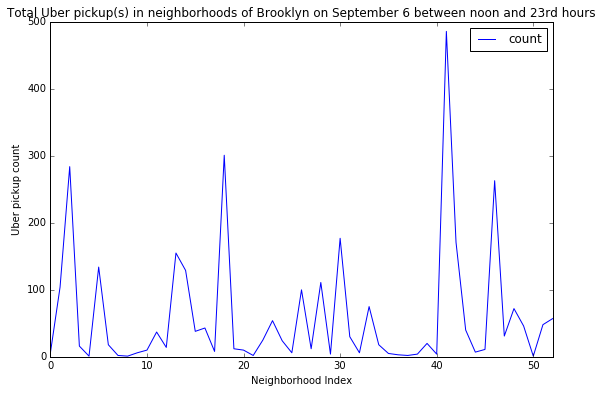

In [385]:
brooklyn_sep6_peak_plot = brooklyn_sep6_peak_df.plot(
    title='Total Uber pickup(s) in neighborhoods of Brooklyn on September 6 between noon and 23rd hours'
    ,figsize=(9,6))
brooklyn_sep6_peak_plot.set_xlabel('Neighborhood Index')
brooklyn_sep6_peak_plot.set_ylabel('Uber pickup count')

In [386]:
# print the neighborhoods between index 40 and 50 to view the one with highest count
brooklyn_sep6_peak_df[40:50]

,Neighborhood,count
40,Mill Basin,4
41,Park Slope,486
42,Prospect Heights,171
43,Prospect Lefferts Gardens,40
44,Prospect Park South,7
45,Prospect-Lefferts Gardens Hist,11
46,Red Hook,263
47,Sheepshead Bay,31
48,South Slope,72
49,Sunset Park,46


# Analysis for mid-of-week commute by Uber

Anaylsis for uber pickup on Wednesday as mid of the week to check patterns for residents utlizing uber service, and filter out the tourists' requests for uber pickup around weekend.

Lets start with whole data set again, and analyze the pickup data on Wednesday(s)

In [387]:
uber_wed_df = uber_df[(uber_df['Pickup_Time'].dt.dayofweek == 2)]
uber_wed_df.head(5)

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
40,2014-07-09 22:56:00,Princeton Junction,,West Windsor Township,Mercer County,NJ,US,40.3157,-74.6238
44,2014-09-10 22:43:00,Princeton Junction,,West Windsor Township,Mercer County,NJ,US,40.3159,-74.6237
47,2014-05-28 23:24:00,Princeton Junction,,West Windsor Township,Mercer County,NJ,US,40.3163,-74.6244
50,2014-04-09 21:34:00,Princeton Junction,,West Windsor Township,Mercer County,NJ,US,40.3164,-74.6250
72,2014-07-02 17:52:00,Dayton,,South Brunswick Township,Middlesex County,NJ,US,40.3747,-74.5203


In [388]:
uber_neighborhood_wed_sg = uber_df['Pickup_Time'].groupby(uber_wed_df['Neighborhood'])
uber_neighborhood_wed_sg.describe().head(12)

Neighborhood         
Alphabet City  count                     154
               unique                    153
               top       2014-07-16 06:59:00
               freq                        2
               first     2014-04-02 06:26:00
               last      2014-09-24 19:58:00
Arrochar       count                       4
               unique                      4
               top       2014-09-17 07:06:00
               freq                        1
               first     2014-07-02 13:35:00
               last      2014-09-17 13:50:00
Name: Pickup_Time, dtype: object

In [389]:
# get count by neighbourhood
neighborhood_wed_df = pd.DataFrame({'count' : uber_neighborhood_wed_sg.size()}).reset_index()
print('Neighborhood with lowest ubder pickup on Wednesday\n', neighborhood_wed_df.sort_values(by='count').head(5))
print('Neighborhood with highest ubder pickup on Wednesday\n',neighborhood_wed_df.sort_values(by='count').tail(5))

Neighborhood with lowest ubder pickup on Wednesday
         Neighborhood  count
129         Richmond      1
102     Martinsville      1
90   Laurence Harbor      1
81   Hudson Exchange      1
79            Hollis      1
Neighborhood with highest ubder pickup on Wednesday
            Neighborhood  count
67              Gowanus   1744
8    Bedford-Stuyvesant   2678
39        Crown Heights   3010
95      Lower Manhattan   3140
117          Park Slope   4963


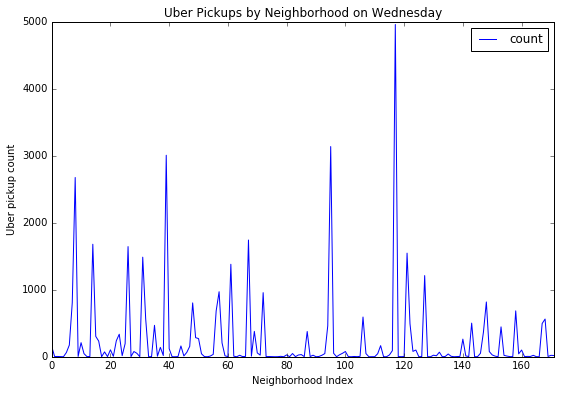

In [390]:
neighborhood_wed_plot = neighborhood_wed_df.plot(title='Uber Pickups by Neighborhood on Wednesday', figsize=(9,6))
neighborhood_wed_plot.set_xlabel('Neighborhood Index')
neighborhood_wed_plot.set_ylabel('Uber pickup count')

So, from the above chart for Uber pickup on Wednesday(s), Park Slope neighborhood is still rank highest for uber pickup count. 

Analyze data for Park Slope neighborhood

In [391]:
uber_wed_parkslope_df = uber_df[(uber_df['Pickup_Time'].dt.dayofweek == 2)&(uber_df['Neighborhood'] == 'Park Slope')]
uber_wed_parkslope_df.head(5)

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
58681,2014-08-27 18:07:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6579,-73.9831
58862,2014-09-24 07:50:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6580,-73.9826
59257,2014-09-24 17:41:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6582,-73.9824
59850,2014-08-06 13:54:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6584,-73.9823
60106,2014-09-24 02:52:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6585,-73.9840


In [392]:
uber_wed_parkslope_ts = uber_wed_parkslope_df['Pickup_Time'].groupby(uber_wed_parkslope_df['Pickup_Time']).count()
type(uber_wed_parkslope_ts)

pandas.core.series.Series

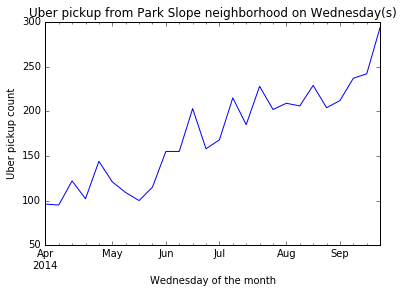

In [393]:
uber_wed_parkslope_plot = uber_wed_parkslope_ts.resample('W-WED').count().plot(
    title='Uber pickup from Park Slope neighborhood on Wednesday(s)')
uber_wed_parkslope_plot.set_xlabel('Wednesday of the month')
uber_wed_parkslope_plot.set_ylabel('Uber pickup count')

Analyze the Wednesday Uber pickups in Park Slope neighborhood by hours for month of August. The Wednesday in August 2014 are 6th, 13th, 20th and 27th day of the month.

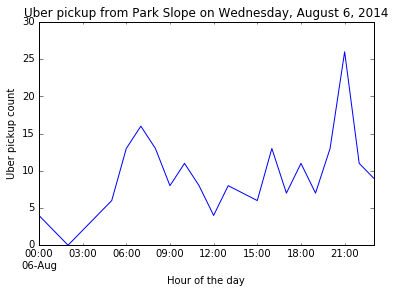

In [394]:
uber_august_06_wed_parkslope_plot = uber_wed_parkslope_ts['2014-08-06'].resample('H').count().plot(
    title='Uber pickup from Park Slope on Wednesday, August 6, 2014')
uber_august_06_wed_parkslope_plot.set_xlabel('Hour of the day')
uber_august_06_wed_parkslope_plot.set_ylabel('Uber pickup count')

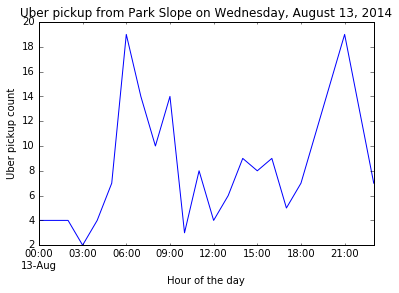

In [395]:
uber_august_13_wed_parkslope_plot = uber_wed_parkslope_ts['2014-08-13'].resample('H').count().plot(
    title='Uber pickup from Park Slope on Wednesday, August 13, 2014')
uber_august_13_wed_parkslope_plot.set_xlabel('Hour of the day')
uber_august_13_wed_parkslope_plot.set_ylabel('Uber pickup count')

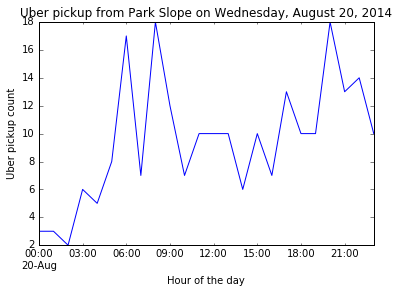

In [396]:
uber_august_20_wed_parkslope_plot = uber_wed_parkslope_ts['2014-08-20'].resample('H').count().plot(
    title='Uber pickup from Park Slope on Wednesday, August 20, 2014')
uber_august_20_wed_parkslope_plot.set_xlabel('Hour of the day')
uber_august_20_wed_parkslope_plot.set_ylabel('Uber pickup count')

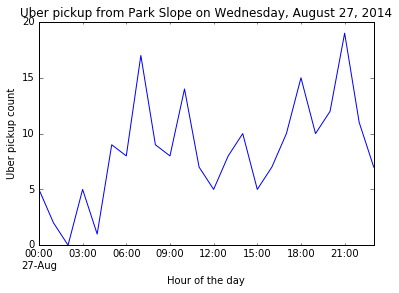

In [397]:
uber_august_27_wed_parkslope_plot = uber_wed_parkslope_ts['2014-08-27'].resample('H').count().plot(
    title='Uber pickup from Park Slope on Wednesday, August 27, 2014')
uber_august_27_wed_parkslope_plot.set_xlabel('Hour of the day')
uber_august_27_wed_parkslope_plot.set_ylabel('Uber pickup count')

From the above four charts, each representing hourly Uber pickup on Wednesday(s) in August 2014, it is clears that there are about 16 to 17 riders who has called Uber for pickup around 6am in August 2014 on Wednesday. Assuming these riders are residents at the time, they might have called for Uber service for pickup around 6am every weekday during their residency in the neighborhood of Park Slope

### Analysis of ParkSlope  Area for hours between 6am and 9am on Wednesdays

In [398]:
uber_parkslope_wed_morning= uber_wed_parkslope_df[(uber_wed_parkslope_df['Pickup_Time'].dt.hour >= 6) &
                                              (uber_wed_parkslope_df['Pickup_Time'].dt.hour <= 9)]
uber_parkslope_wed_morning.head()

,Pickup_Time,Neighborhood,Sublocality,Locality,County,State,Country,Lat,Lon
58862,2014-09-24 07:50:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6580,-73.9826
61364,2014-04-23 08:18:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6590,-73.9816
61740,2014-04-02 06:16:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6591,-73.9816
61753,2014-05-07 06:19:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6591,-73.9815
62220,2014-08-06 07:00:00,Park Slope,Brooklyn,New York,Kings County,NY,US,40.6592,-73.9822


In [399]:
uber_parkslope_wed_morning = uber_parkslope_wed_morning.reset_index()

In [400]:
# get the Lat, Lon column only in order to prepare it for database query
uber_parkslope_wed_morning_coordinates = uber_parkslope_wed_morning[['Lat','Lon']]
uber_parkslope_wed_morning_coordinates.head()

,Lat,Lon
0,40.6580,-73.9826
1,40.6590,-73.9816
2,40.6591,-73.9816
3,40.6591,-73.9815
4,40.6592,-73.9822


In [401]:
# Prepare select statement and dataframe to retreive and hold data for given Lat, Lon values
select_address_sql = "select Street, City, State, Zipcode, Country, Lat, Lon from riders.street_address where lat=%s and lon=%s"
street_address_columns = ["Street","City","State","Zipcode","Country", "Lat", "Lon"]
street_address_df = pd.DataFrame([],columns=street_address_columns)

In [402]:
# retrieve data for given Lat, Lon that is collected from Park Slope area for Wednesdays' Pickup
conn = pymysql.connect(host=rhost, port=rport, user=ruser, passwd=rpasswd, db=rdb)
for params in uber_parkslope_wed_morning_coordinates.values.tolist():
    df = pd.read_sql(select_address_sql, conn, params=params)
    street_address_df = street_address_df.append(df, ignore_index=True)
conn.close()

In [403]:
street_address_df.head()

,Street,City,State,Zipcode,Country,Lat,Lon
0,280-282 Prospect Park West,Brooklyn,NY,11215,US,40.6580,-73.9826
1,256A Prospect Park West,Brooklyn,NY,11215,US,40.6590,-73.9816
2,485 Prospect Ave,Brooklyn,NY,11215,US,40.6591,-73.9816
3,244A Prospect Park West,Brooklyn,NY,11215,US,40.6591,-73.9815
4,477 Prospect Ave,Brooklyn,NY,11215,US,40.6592,-73.9822


In [404]:
# get aggregate information about addresses as how many pickups happen from there on wednesdays
street_address_count_df = street_address_df['Street'].groupby(street_address_df['Street']).count()
type(street_address_count_df)

pandas.core.series.Series

In [405]:
street_address_count_df.head()

Street
1 7th Ave           1
1-15 St Johns Pl    1
10 Montgomery Pl    1
100 8th Ave         1
100 Garfield Pl     1
Name: Street, dtype: int64

In [406]:
# sort the address pickup counts in order to list the max counts first
street_address_count_df.sort(ascending=False)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


In [407]:
street_address_count_df.head(12)

Street
274A 16th St         7
295A 5th Ave         6
277 Prospect Ave     6
617-619 3rd St       6
305-333 5th St       6
315 5th Ave          6
1648-1650 8th Ave    5
369 14th St          5
925 Union St         5
367 5th Ave          5
26 Sterling Pl       5
130 Sterling Pl      4
Name: Street, dtype: int64

The above summary shows that on Wednesdays, there were 7 pickups from the address '274A 16th St', and 6 from each '295A 5th Ave' and '277 Prospect Ave'. Next, let's retreive all the pickup times for these addresses.

### Analysis of Uber pickup time for specific addresses

In [408]:
street_address_df[(street_address_df.Street == '274A 16th St')
                  |(street_address_df.Street == '295A 5th Ave')
                  |(street_address_df.Street == '277 Prospect Ave')]

,Street,City,State,Zipcode,Country,Lat,Lon
102,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9863
103,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9863
104,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9863
105,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9863
106,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9862
107,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9862
110,274A 16th St,Brooklyn,NY,11215,US,40.6633,-73.9865
114,277 Prospect Ave,Brooklyn,NY,11215,US,40.6634,-73.9893
115,277 Prospect Ave,Brooklyn,NY,11215,US,40.6634,-73.9893
120,277 Prospect Ave,Brooklyn,NY,11215,US,40.6635,-73.9894


In [409]:
# prepare and retreive Pickup Time for specific addresses for analysis
select_specific_address = "SELECT u.Pickup_Time, s.* FROM uber_pickup u, coordinates c, street_address s \
              WHERE c.lat = u.lat AND c.lon = u.lon \
              AND s.lat = c.lat AND s.lon = c.lon AND s.street in (%s, %s, %s) order by u.Pickup_Time"

conn = pymysql.connect(host=rhost, port=rport, user=ruser, passwd=rpasswd, db=rdb)
specific_address_df = pd.read_sql(select_specific_address, conn, 
                                  params={'274A 16th St','295A 5th Ave','277 Prospect Ave'})
conn.close()
specific_address_df.head()

,Pickup_Time,Street,City,State,Zipcode,Country,Lat,Lon,Processed
0,2014-04-01 08:37:00,277 Prospect Ave,Brooklyn,NY,11215,US,40.6635,-73.9893,0.0
1,2014-04-01 14:07:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0
2,2014-04-02 23:56:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6736,-73.9826,0.0
3,2014-04-04 18:48:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0
4,2014-04-05 01:55:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0


In [410]:
# Separate the Pickup Time in Date and Time in order to plot it
specific_address_df['Pickup_Date'] = [d.date() for d in specific_address_df['Pickup_Time']]
specific_address_df['Pickup_ClockTime'] = [d.time() for d in specific_address_df['Pickup_Time']]
specific_address_df.head()

,Pickup_Time,Street,City,State,Zipcode,Country,Lat,Lon,Processed,Pickup_Date,Pickup_ClockTime
0,2014-04-01 08:37:00,277 Prospect Ave,Brooklyn,NY,11215,US,40.6635,-73.9893,0.0,2014-04-01,08:37:00
1,2014-04-01 14:07:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0,2014-04-01,14:07:00
2,2014-04-02 23:56:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6736,-73.9826,0.0,2014-04-02,23:56:00
3,2014-04-04 18:48:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0,2014-04-04,18:48:00
4,2014-04-05 01:55:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0,2014-04-05,01:55:00


In [411]:
# Filter address for specific address '277 Prospect Ave' in order to plot pickup time as separate trend
Prospect_Ave_277_df = specific_address_df[(specific_address_df['Street']=='277 Prospect Ave')]
Prospect_Ave_277_df.tail()

,Pickup_Time,Street,City,State,Zipcode,Country,Lat,Lon,Processed,Pickup_Date,Pickup_ClockTime
141,2014-09-03 21:50:00,277 Prospect Ave,Brooklyn,NY,11215,US,40.6635,-73.9893,0.0,2014-09-03,21:50:00
150,2014-09-12 14:51:00,277 Prospect Ave,Brooklyn,NY,11215,US,40.6635,-73.9893,0.0,2014-09-12,14:51:00
152,2014-09-13 20:37:00,277 Prospect Ave,Brooklyn,NY,11215,US,40.6634,-73.9893,0.0,2014-09-13,20:37:00
163,2014-09-20 09:28:00,277 Prospect Ave,Brooklyn,NY,11215,US,40.6635,-73.9894,0.0,2014-09-20,09:28:00
169,2014-09-27 18:07:00,277 Prospect Ave,Brooklyn,NY,11215,US,40.6634,-73.9893,0.0,2014-09-27,18:07:00


In [412]:
# Filter address for specific address '274A 16th St' in order to plot pickup time as separate trend
A274_16th_St_df = specific_address_df[(specific_address_df['Street']=='274A 16th St')]
A274_16th_St_df.tail()

,Pickup_Time,Street,City,State,Zipcode,Country,Lat,Lon,Processed,Pickup_Date,Pickup_ClockTime
146,2014-09-09 14:46:00,274A 16th St,Brooklyn,NY,11215,US,40.6633,-73.9864,0.0,2014-09-09,14:46:00
153,2014-09-13 22:33:00,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9862,0.0,2014-09-13,22:33:00
157,2014-09-17 06:32:00,274A 16th St,Brooklyn,NY,11215,US,40.6633,-73.9865,0.0,2014-09-17,06:32:00
158,2014-09-17 08:44:00,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9862,0.0,2014-09-17,08:44:00
165,2014-09-24 07:46:00,274A 16th St,Brooklyn,NY,11215,US,40.6632,-73.9863,0.0,2014-09-24,07:46:00


In [413]:
# Filter address for specific address '295A 5th Ave' in order to plot pickup time as separate trend
A295_5th_Ave_df = specific_address_df[(specific_address_df['Street']=='295A 5th Ave')]
A295_5th_Ave_df.tail()

,Pickup_Time,Street,City,State,Zipcode,Country,Lat,Lon,Processed,Pickup_Date,Pickup_ClockTime
167,2014-09-27 10:48:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6736,-73.9826,0.0,2014-09-27,10:48:00
168,2014-09-27 16:18:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0,2014-09-27,16:18:00
170,2014-09-27 19:15:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6736,-73.9826,0.0,2014-09-27,19:15:00
171,2014-09-29 14:02:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6735,-73.9826,0.0,2014-09-29,14:02:00
172,2014-09-29 21:01:00,295A 5th Ave,Brooklyn,NY,11215,US,40.6736,-73.9825,0.0,2014-09-29,21:01:00


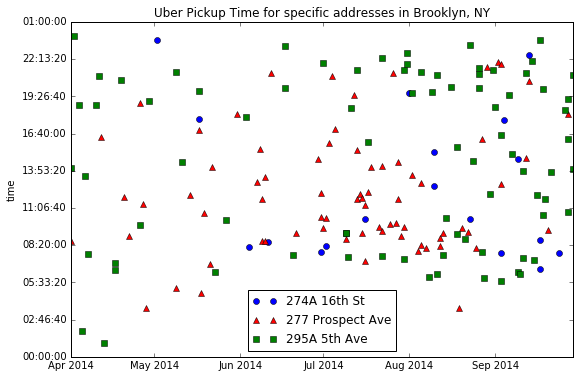

In [414]:
#Plot separate trend for pickup time for each selective address separately
plt.figure(figsize=(9,6))
plt.title("Uber Pickup Time for specific addresses in Brooklyn, NY")
plt.plot(
    A274_16th_St_df['Pickup_Date'],A274_16th_St_df['Pickup_ClockTime'], 'bo',
    Prospect_Ave_277_df['Pickup_Date'],Prospect_Ave_277_df['Pickup_ClockTime'], 'r^',
    A295_5th_Ave_df['Pickup_Date'],A295_5th_Ave_df['Pickup_ClockTime'], 'gs'
)
plt.legend({'274A 16th St','277 Prospect Ave','295A 5th Ave'},loc=8)
plt.show()

The above chart shows the pickup times for each of the three selective address. One of the trend showing up is that certain Uber pickup happened for address '295A 5th Ave' between 5am and 9am during July 2014 and September 2014.For address '277 Prospect Ave', uber pickup happened around 8am to 10am during July 2014 and August 2014.